In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np
from statsmodels.graphics.gofplots import qqplot_2samples, qqplot
import scipy.stats

%matplotlib inline

## Question 1

In [2]:
df = pd.read_csv('gapminder.tsv', delimiter='\t')

In [3]:
df.head(10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [4]:
df.corr(method='pearson')

,year,lifeExp,pop,gdpPercap
year,1.000000,0.435611,0.082308,0.227318
lifeExp,0.435611,1.000000,0.064955,0.583706
pop,0.082308,0.064955,1.000000,-0.025600
gdpPercap,0.227318,0.583706,-0.025600,1.000000


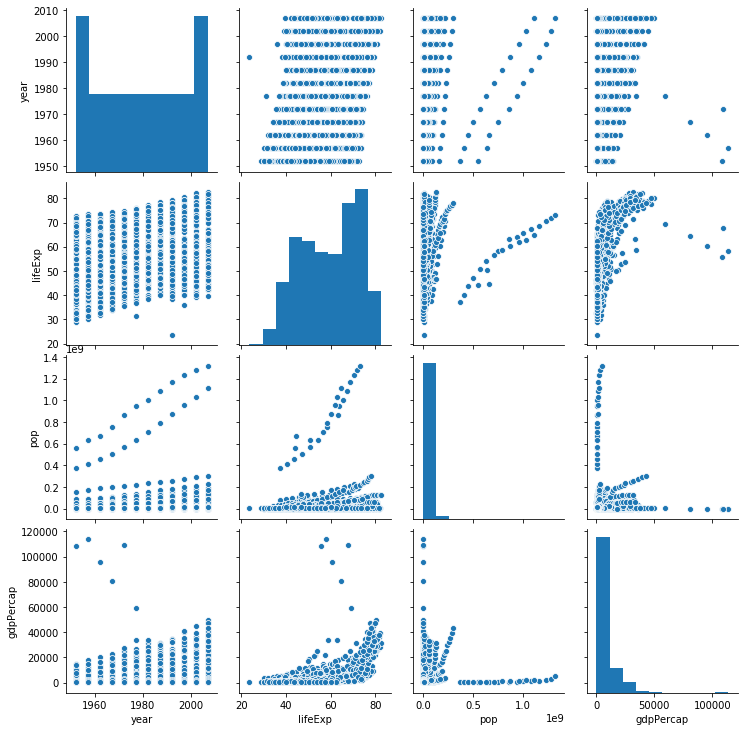

In [5]:
sns.pairplot(df)

In [6]:
data=df[['continent','year','gdpPercap']]

In [79]:
mean=data.groupby(['continent','year']).mean()
mean.head()

gdpPercap
continent year             
Africa    1952  1252.572466
          1957  1385.236062
          1962  1598.078825
          1967  2050.363801
          1972  2339.615674

In [8]:
mean.reset_index(inplace=True)
f=mean.pivot(index='year',columns='continent',values='gdpPercap')
f

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,1252.572466,4079.062552,5195.484004,5661.057435,10298.085650
1957,1385.236062,4616.043733,5787.732940,6963.012816,11598.522455
1962,1598.078825,4901.541870,5729.369625,8365.486814,12696.452430
1967,2050.363801,5668.253496,5971.173374,10143.823757,14495.021790
1972,2339.615674,6491.334139,8187.468699,12479.575246,16417.333380
1977,2585.938508,7352.007126,7791.314020,14283.979110,17283.957605
1982,2481.592960,7506.737088,7434.135157,15617.896551,18554.709840
1987,2282.668991,7793.400261,7608.226508,17214.310727,20448.040160
1992,2281.810333,8044.934406,8639.690248,17061.568084,20894.045885


In [9]:
f.corr(method='pearson')

continent,Africa,Americas,Asia,Europe,Oceania
continent,,,,,
Africa,1.000000,0.923699,0.870737,0.910507,0.872341
Americas,0.923699,1.000000,0.963464,0.995973,0.987059
Asia,0.870737,0.963464,1.000000,0.951752,0.964803
Europe,0.910507,0.995973,0.951752,1.000000,0.992091
Oceania,0.872341,0.987059,0.964803,0.992091,1.000000


Text(0.5, 0, 'Africa')

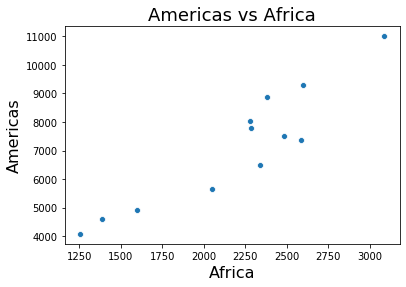

In [10]:
sns.scatterplot('Africa','Americas',data=f)
plt.title('Americas vs Africa', fontsize=18)
plt.ylabel('Americas', fontsize=16)
plt.xlabel('Africa', fontsize=16)

Text(0.5, 0, 'Africa')

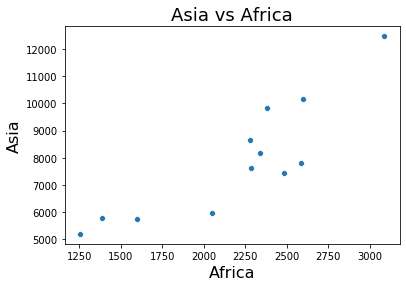

In [11]:
sns.scatterplot('Africa','Asia',data=f)
plt.title('Asia vs Africa', fontsize=18)
plt.ylabel('Asia', fontsize=16)
plt.xlabel('Africa', fontsize=16)

Text(0.5, 0, 'Africa')

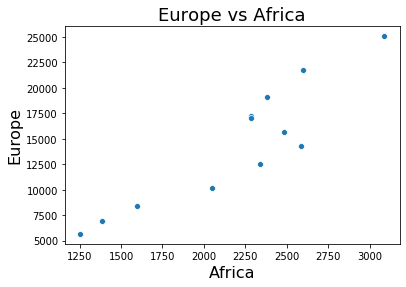

In [12]:
sns.scatterplot('Africa','Europe',data=f)
plt.title('Europe vs Africa', fontsize=18)
plt.ylabel('Europe', fontsize=16)
plt.xlabel('Africa', fontsize=16)

Text(0.5, 0, 'Africa')

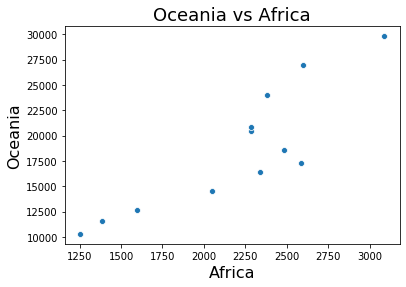

In [13]:
sns.scatterplot('Africa','Oceania',data=f)
plt.title('Oceania vs Africa', fontsize=18)
plt.ylabel('Oceania', fontsize=16)
plt.xlabel('Africa', fontsize=16)

Text(0.5, 0, 'Americas')

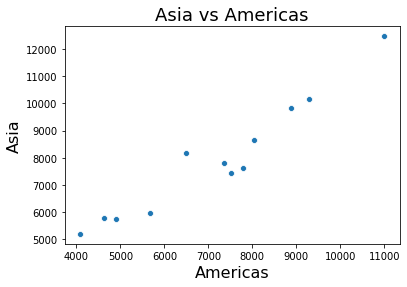

In [14]:
sns.scatterplot('Americas','Asia',data=f)
plt.title('Asia vs Americas', fontsize=18)
plt.ylabel('Asia', fontsize=16)
plt.xlabel('Americas', fontsize=16)

Text(0.5, 0, 'Americas')

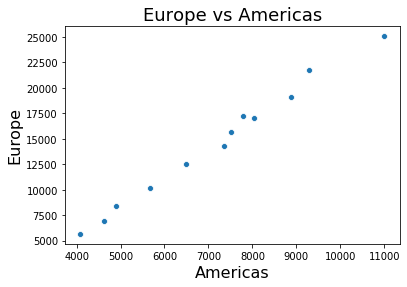

In [15]:
sns.scatterplot('Americas','Europe',data=f)
plt.title('Europe vs Americas', fontsize=18)
plt.ylabel('Europe', fontsize=16)
plt.xlabel('Americas', fontsize=16)

Text(0.5, 0, 'Americas')

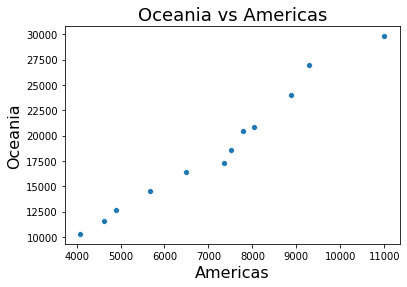

In [16]:
sns.scatterplot('Americas','Oceania',data=f)
plt.title('Oceania vs Americas', fontsize=18)
plt.ylabel('Oceania', fontsize=16)
plt.xlabel('Americas', fontsize=16)

Text(0.5, 0, 'Asia')

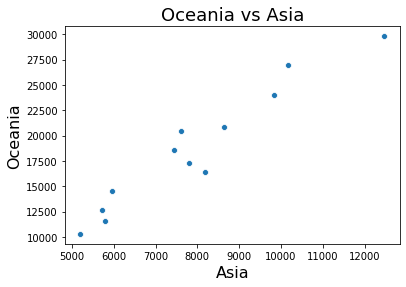

In [17]:
sns.scatterplot('Asia','Oceania',data=f)
plt.title('Oceania vs Asia', fontsize=18)
plt.ylabel('Oceania', fontsize=16)
plt.xlabel('Asia', fontsize=16)

Text(0.5, 0, 'Asia')

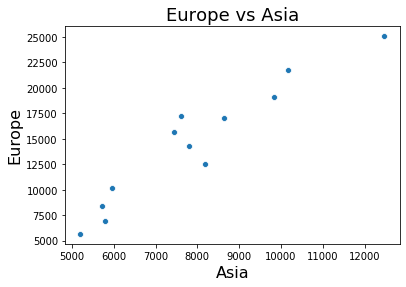

In [18]:
sns.scatterplot('Asia','Europe',data=f)
plt.title('Europe vs Asia', fontsize=18)
plt.ylabel('Europe', fontsize=16)
plt.xlabel('Asia', fontsize=16)

## Question 2

In [19]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


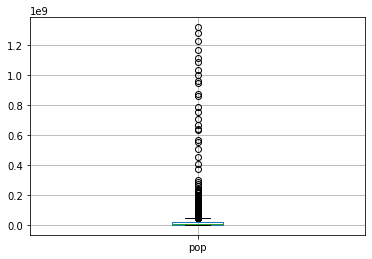

In [20]:
df.boxplot(column=['pop'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D27EE31208>]],
      dtype=object)

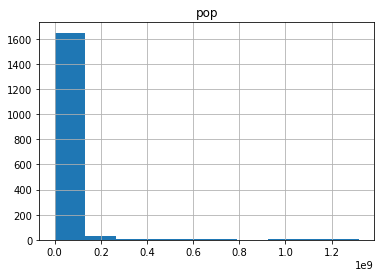

In [21]:
df.hist(column=['pop'])

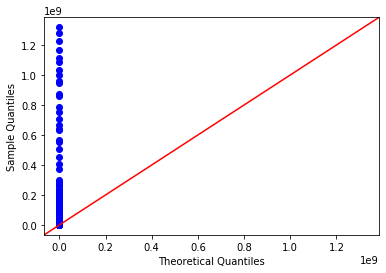

In [22]:
qqplot(df['pop'], line ='45')
plt.show()

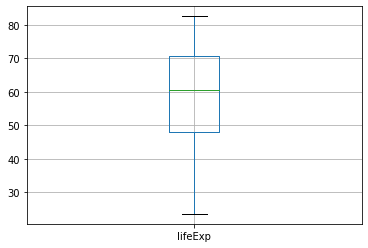

In [23]:
df.boxplot(column=['lifeExp'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D27EFA86C8>]],
      dtype=object)

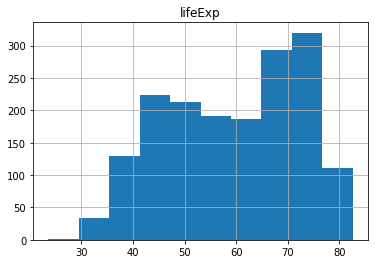

In [24]:
df.hist(column=['lifeExp'])

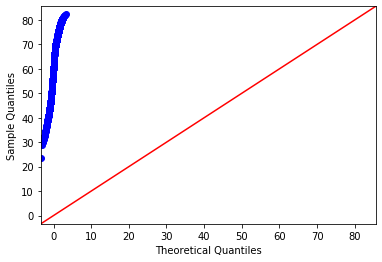

In [25]:
qqplot(df['lifeExp'], line ='45')
plt.show()

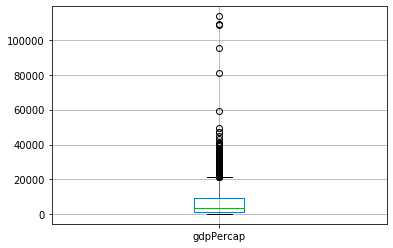

In [26]:
df.boxplot(column=['gdpPercap'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D27F1052C8>]],
      dtype=object)

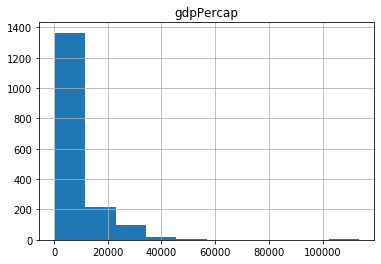

In [27]:
df.hist(column=['gdpPercap'])

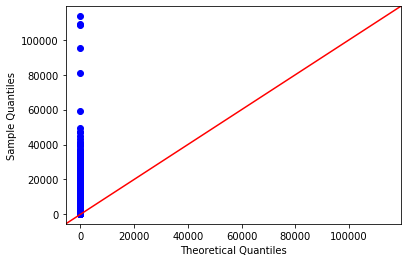

In [28]:
qqplot(df['gdpPercap'], line ='45')
plt.show()

#### All three variables don't form a 45 degree line so they are not normally distributed.

In [29]:
df1=df[df['continent'] =='Europe']

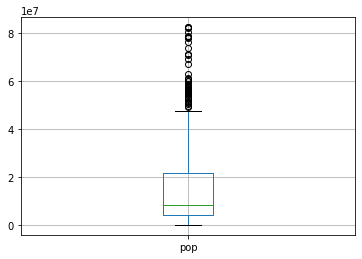

In [30]:
df1.boxplot(column=['pop'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D27F24FE48>]],
      dtype=object)

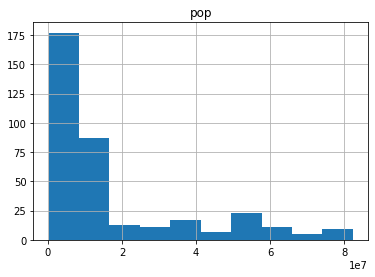

In [31]:
df1.hist(column=['pop'])

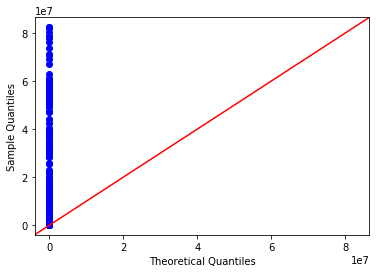

In [32]:
qqplot(df1['pop'], line ='45')
plt.show()

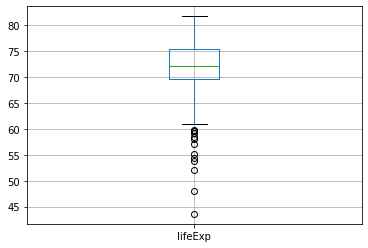

In [33]:
df1.boxplot(column=['lifeExp'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D27F2E9A48>]],
      dtype=object)

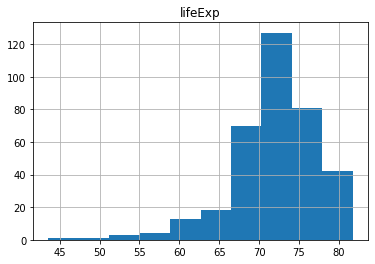

In [34]:
df1.hist(column=['lifeExp'])

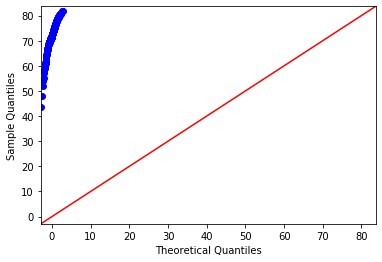

In [35]:
qqplot(df1['lifeExp'], line ='45')
plt.show()

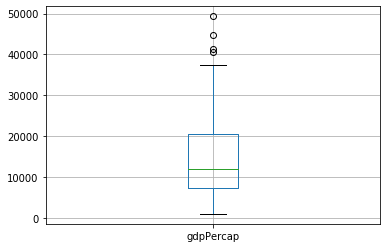

In [36]:
df1.boxplot(column=['gdpPercap'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D27EFB6A48>]],
      dtype=object)

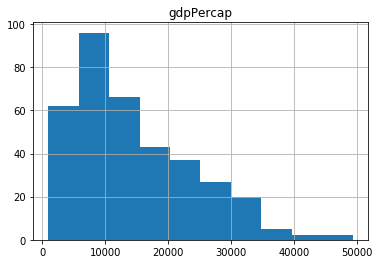

In [37]:
df1.hist(column=['gdpPercap'])

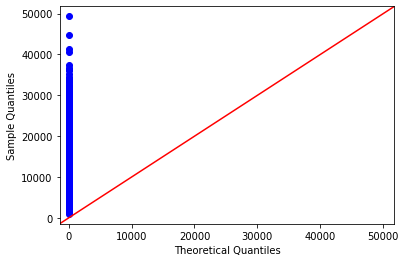

In [38]:
qqplot(df1['gdpPercap'], line ='45')
plt.show()

#### All three variables don't form a 45 degree line so they are not normally distributed for Europe.

In [39]:
df2=df[df['continent'] =='Asia']

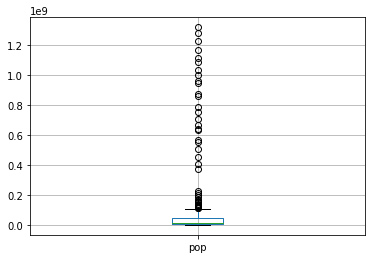

In [40]:
df2.boxplot(column=['pop'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D27F4D0648>]],
      dtype=object)

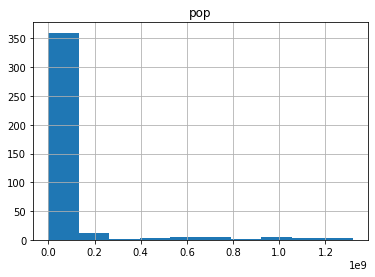

In [41]:
df2.hist(column=['pop'])

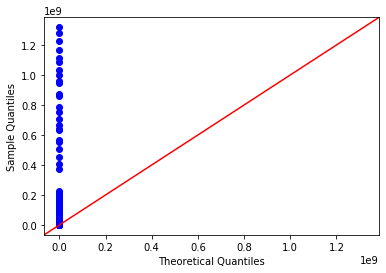

In [42]:
qqplot(df2['pop'], line ='45')
plt.show()

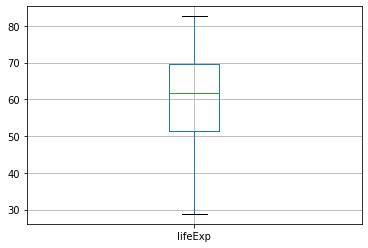

In [43]:
df2.boxplot(column=['lifeExp'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D27F62CA08>]],
      dtype=object)

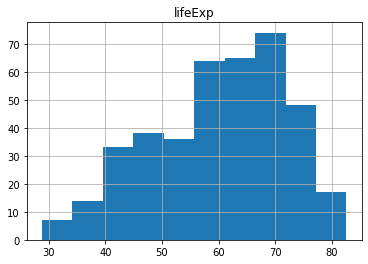

In [44]:
df2.hist(column=['lifeExp'])

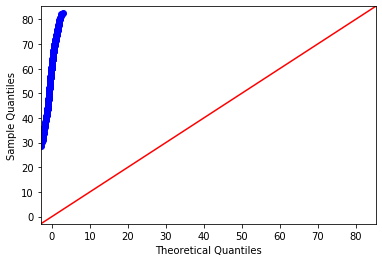

In [45]:
qqplot(df2['lifeExp'], line ='45')
plt.show()

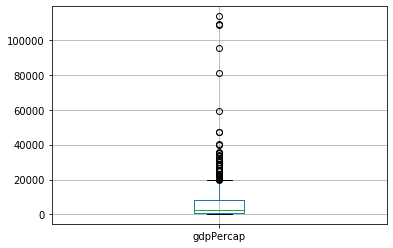

In [46]:
df2.boxplot(column=['gdpPercap'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D27F792588>]],
      dtype=object)

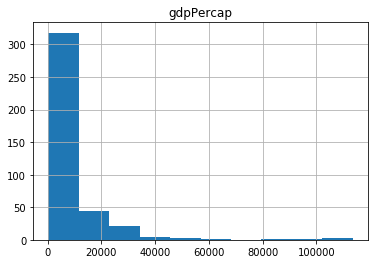

In [47]:
df2.hist(column=['gdpPercap'])

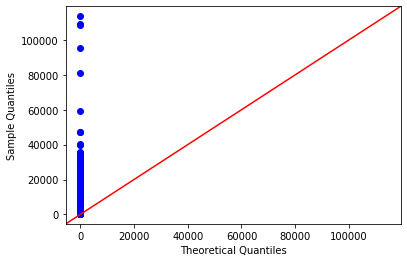

In [48]:
qqplot(df2['gdpPercap'], line ='45')
plt.show()

#### All three variables don't form a 45 degree line so they are not normally distributed for Asia.

## Question 3

In [49]:
lm1 = smf.ols(formula='lifeExp ~ pop', data=df).fit()
lm1.params

Intercept    5.924048e+01
pop          7.903656e-09
dtype: float64

#### A "unit" increase in population is associated with a 7.903656e-09 "unit" increase in life expectancy.

In [50]:
lm2 = smf.ols(formula='lifeExp ~ gdpPercap', data=df).fit()
lm2.params

Intercept    53.955561
gdpPercap     0.000765
dtype: float64

#### A "unit" increase in gdp percapita is associated with a 0.000765 "unit" increase in life expectancy.

In [51]:
lm1.pvalues

Intercept    0.000000
pop          0.007314
dtype: float64

In [52]:
lm2.pvalues

Intercept     0.000000e+00
gdpPercap    3.565724e-156
dtype: float64

#### gdpPercap works the best since its p value is smaller, indicating a stronger relationship.

In [53]:
lm3 = smf.ols(formula='lifeExp ~ pop', data=df1).fit()
lm3.params

Intercept    7.162039e+01
pop          1.649978e-08
dtype: float64

#### A "unit" increase in population is associated with a 1.649978e-08 "unit" increase in life expectancy for Europe.

In [54]:
lm4 = smf.ols(formula='lifeExp ~ gdpPercap', data=df1).fit()
lm4.params

Intercept    65.342484
gdpPercap     0.000453
dtype: float64

#### A "unit" increase in gdp percapita is associated with a 0.000453 "unit" increase in life expectancy for Europe.

In [55]:
lm3.pvalues

Intercept    0.000000
pop          0.238251
dtype: float64

In [56]:
lm4.pvalues

Intercept    0.000000e+00
gdpPercap    4.047785e-75
dtype: float64

In [57]:
lm5 = smf.ols(formula='lifeExp ~ pop', data=df2).fit()
lm5.params

Intercept    5.991843e+01
pop          1.901286e-09
dtype: float64

#### A "unit" increase in population is associated with a 1.901286e-09 "unit" increase in life expectancy for Europe.

In [58]:
lm6 = smf.ols(formula='lifeExp ~ gdpPercap', data=df2).fit()
lm6.params

Intercept    57.514669
gdpPercap     0.000323
dtype: float64

#### A "unit" increase in gdp percapita is associated with a 0.000323 "unit" increase in life expectancy for Europe.

In [59]:
lm5.pvalues

Intercept    4.076509e-272
pop           5.106429e-01
dtype: float64

In [60]:
lm6.pvalues

Intercept    2.454492e-266
gdpPercap     3.286795e-15
dtype: float64

#### For both Europe and Asia, gdpPercap works the best since its p value is smaller, indicating a stronger relationship

In [83]:
data=df[df['continent']=='Asia']
data

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1675,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538
1676,"Yemen, Rep.",Asia,1992,55.599,13367997,1879.496673
1677,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827


In [87]:
data1=data[['year','lifeExp']]
data1

,year,lifeExp
0,1952,28.801
1,1957,30.332
2,1962,31.997
3,1967,34.020
4,1972,36.088
...,...,...
1675,1987,52.922
1676,1992,55.599
1677,1997,58.020
1678,2002,60.308


In [90]:
data=data1[['year']=='1952']
data

KeyError: False